In [1]:
#!usr/bin/python

""" Fits the trend of species richness w.r.t. absolute latitude using 
    the Gentry transect database. """

__author__ = 'Katie Hindson (kah15@ic.ac.uk)'
__version__ = '0.0.1'
		
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.patches as mpatches
from pylab import *
from scipy.optimize import curve_fit
import random
%matplotlib inline

## Plotting the function that species richness is following w.r.t. lat (that is implemented in the simulation)...this is the fitted curve for absolute latitude vs. species richness using Gentry Transect Data

Formula for the fit is: richness = (max richness) x (e^[-0.03 x abs.lat - 0.51])


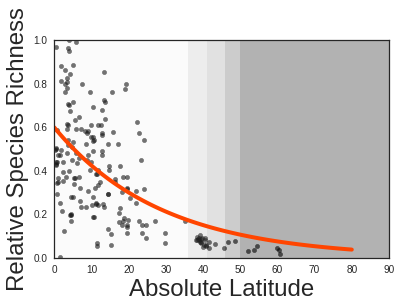

In [2]:
lats_richness_df = pd.read_csv("../Data/gentry_transect_data/gentry_lats_richness.csv")

min_val = min(lats_richness_df.richness)
max_val = max(lats_richness_df.richness)

boundaries = [0, 36.0, 41.0, 46.0, 50.0, 90]

def func(x, a, b):
    return np.exp(-a*x - b)

coeffs, pcov = curve_fit(func, lats_richness_df.abs_lat, lats_richness_df.richness/max_val, p0 = (0.5, 0.7))
xp = np.linspace(0, 80, 100)
p = func(xp, *coeffs)

with plt.style.context("seaborn-white"):        
    plt.scatter(lats_richness_df.abs_lat, lats_richness_df.richness/max_val, color = 'black', alpha = 0.6, s = 20)
    plt.plot(xp, p, '-', linewidth = 4, color = 'orangered')
    plt.fill([boundaries[0], boundaries[1], boundaries[1], boundaries[0]], [0, 0, 1.3, 1.3], 
             'gainsboro', alpha = 0.1)
    plt.fill([boundaries[1], boundaries[2], boundaries[2], boundaries[1]], 
             [0, 0, 1.3, 1.3], 'darkgray', alpha = 0.2)
    plt.fill([boundaries[2], boundaries[3], boundaries[3], boundaries[2]], 
             [0, 0, 1.3, 1.3], 'dimgray', alpha = 0.2)
    plt.fill([boundaries[3], boundaries[4], boundaries[4], boundaries[3]], 
             [0, 0, 1.3, 1.3], 'black', alpha = 0.2)
    plt.fill([boundaries[4], boundaries[5], boundaries[5], boundaries[4]], [0, 0, 1.3, 1.3], 
             'black', alpha = 0.3)
   
    plt.xlim([0, 90])
    plt.ylim([0, 1])

    plt.ylabel('Relative Species Richness', fontsize = 24)
    plt.xlabel('Absolute Latitude', fontsize = 24)

print('Formula for the fit is: richness = (max richness) x (e^[-' + str(round(coeffs[0], 2)) + ' x abs.lat - ' + str(round(coeffs[1], 2)) + '])')

## Making sure that this is indeed a negative exponential relationship

Linear model fitted: -0.05x + -0.54
R-squared value of the linear model fit: 0.531


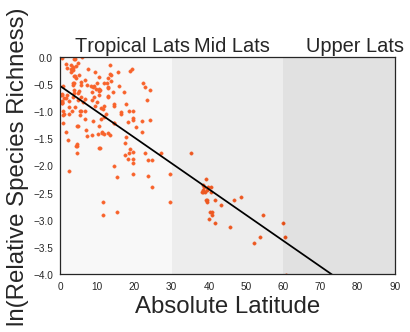

In [3]:
linear_fit = smf.ols(formula = 'np.log(richness/max_val)~abs_lat', data = lats_richness_df).fit()
intercept = [linear_fit.params[0]]
slope = [linear_fit.params[1]]
r_squared = [linear_fit.rsquared]

lats = np.arange(0, 90, 1)
line = slope*lats + intercept

with plt.style.context("seaborn-white"):        
    plt.scatter(lats_richness_df.abs_lat, np.log(lats_richness_df.richness/max_val), color = 'orangered', s = 12)
    
    plt.plot(lats, line, color = 'black')

    plt.fill([0, 30, 30, 0], [0, 0, -4, -4], 'gainsboro', alpha = 0.2)
    plt.fill([30, 60, 60, 30], [0, 0, -4, -4], 'darkgray', alpha = 0.2)
    plt.fill([60, 90, 90, 60], [0, 0, -4, -4], 'dimgray', alpha = 0.2)

    plt.text(4, .1, 'Tropical Lats', fontsize = 20)
    plt.text(36, .1, 'Mid Lats', fontsize = 20)
    plt.text(66, .1, 'Upper Lats', fontsize = 20)

    plt.xlim([0, 90])
    plt.ylim([-4, 0])

    plt.ylabel('ln(Relative Species Richness)', fontsize = 24)
    plt.xlabel('Absolute Latitude', fontsize = 24)

    
print('Linear model fitted: ' + str(round(slope[0], 2)) + 'x + ' + str(round(intercept[0], 2)))
print('R-squared value of the linear model fit: ' + str(round(r_squared[0], 4)))    